## Preparing the Data

In [1]:
# Dependencies
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import os
import numpy as np

# Create paths to reasources
mouse_data_path = os.path.join('Data', 'Mouse_metadata.csv')
study_results_path = os.path.join('Data', 'Study_results.csv')

# Load csvs as dfs...
mouse_df = pd.read_csv(mouse_data_path)
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study_df = pd. read_csv(study_results_path)
study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
mouse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [4]:
study_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [5]:
len(mouse_df['Mouse ID'])

249

In [6]:
len(study_df['Mouse ID'].unique())

249

Both dfs are complete meaning they do not have any **NAs** or missing data. The dfs are different sizes but it looks like there is one entry for ever mouse ID in mouse df. So merge with adding mouse df onto study df.


In [7]:
study_df = pd.merge(study_df, mouse_df, how='left')
study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
study_df.loc[study_df['Timepoint'] == 0, ['Mouse ID']].value_counts()

Mouse ID
g989        2
a203        1
s121        1
q597        1
q610        1
           ..
j246        1
j296        1
j365        1
j755        1
z969        1
Length: 249, dtype: int64

In [9]:
study_df.loc[study_df['Mouse ID'] == 'g989', :]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
study_df.drop(index=[107,137,329,360,620,681,815,869,950,1111,1195,1380,1592], inplace=True)
mouse_df.drop(index=107, inplace=True)

In [11]:
len(study_df['Mouse ID'].unique())

248

## Summary Statistics

In [12]:
# Intialize summary df
summary_df = pd.DataFrame()

summary_df['Mean'] = study_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
summary_df['Median'] = study_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
summary_df['Variance'] = study_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
summary_df['std'] = study_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
summary_df['SEM'] = study_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary_df

,Mean,Median,Variance,std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
summary_df = study_df.groupby('Drug Regimen').agg(Mean=('Tumor Volume (mm3)','mean'),
                                                 Meadian=('Tumor Volume (mm3)','median'),
                                                 Variance=('Tumor Volume (mm3)','var'),
                                                 std=('Tumor Volume (mm3)','std'),
                                                 SEM=('Tumor Volume (mm3)','sem'))
summary_df

,Mean,Meadian,Variance,std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


 ## Number of Timepoints (Bar Chart)

<AxesSubplot:title={'center':'Total Number of Timepoints for Mice Tested'}, xlabel='Drug Regimen', ylabel='# of Timpoints'>

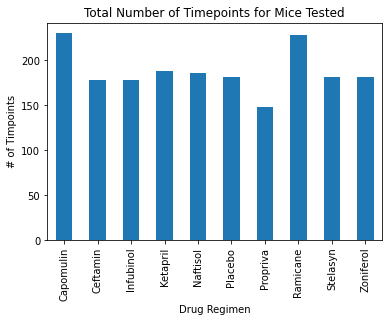

In [14]:
study_df.groupby('Drug Regimen').count()['Timepoint'].plot(kind='bar', ylabel='# of Timpoints', title='Total Number of Timepoints for Mice Tested')

Text(0.5, 1.0, 'Total Number of Timepoints for Mice Tested')

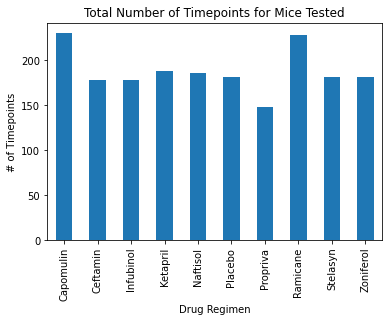

In [15]:
x_axis = np.arange(len(study_df.groupby('Drug Regimen').count()['Timepoint']))
tick_locations = [value for value in x_axis]
labels = study_df.sort_values('Drug Regimen')['Drug Regimen'].unique()
plt.bar(x_axis, study_df.groupby('Drug Regimen').count()['Timepoint'], width=.5)
plt.xticks(tick_locations, labels, rotation='vertical')
plt.xlim(-0.5, len(x_axis)-0.5)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Timepoints')
plt.title('Total Number of Timepoints for Mice Tested')

## Number of Mice by Sex (Pie Chart)

<AxesSubplot:>

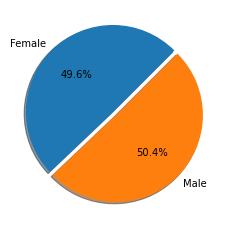

In [16]:
mouse_df.groupby('Sex').count()['Mouse ID'].plot(kind='pie', ylabel='', autopct='%.1f%%', shadow=True, startangle=45, explode=[.05,0])

In [17]:
study_df.groupby('Drug Regimen').count()['Timepoint']

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

([<matplotlib.patches.Wedge at 0x266ef339a00>,
 [Text(-0.8028068003151382, 0.8234083078083254, 'Female'),
  Text(0.7679021568231755, -0.7876079465992679, 'Male')],
 [Text(-0.45376036539551284, 0.46540469571774906, '49.6%'),
  Text(0.41885572190355025, -0.42960433450869157, '50.4%')])

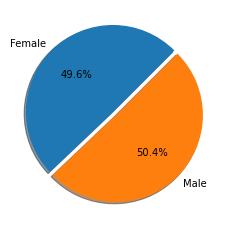

In [18]:
sizes = mouse_df.groupby('Sex', as_index=False).count()['Mouse ID']
labels = mouse_df.groupby('Sex', as_index=False).count()['Sex']
plt.pie(mouse_df.groupby('Sex').count()['Mouse ID'], labels=labels, autopct='%.1f%%', shadow=True, startangle=45, explode=[.05,0])


## Final Tumor Volume

In [19]:
# Initialize df that stores final volume by ID
final_volume_by_ID = pd.DataFrame()

# loop over all IDs
for ID in study_df['Mouse ID']:
    
    # Intialize a placeholder df that stores all volumes for a specific ID
    time_and_volume_for_ID = pd.DataFrame()
    
    # Filter by ID
    time_and_volume_for_ID[['Regimen', 'Volume']] = study_df.loc[study_df['Mouse ID'] == ID, ['Drug Regimen', 'Tumor Volume (mm3)']]
    
    final_volume_by_ID.loc[ID, 'Regimen'] = time_and_volume_for_ID.iloc[0,0]
    final_volume_by_ID.loc[ID, 'Final Volume'] = time_and_volume_for_ID.iloc[-1, 1]
    
# Show df
final_volume_by_ID.groupby('Regimen').mean()

,Final Volume
Regimen,
Capomulin,36.667568
Ceftamin,57.753977
Infubinol,58.178246
Ketapril,62.806191
Naftisol,61.205757
Placebo,60.508414
Propriva,56.493884
Ramicane,36.191390
Stelasyn,61.001707


In [38]:
# Create df that stores maximum timepoint for each mouse ID
greatest_timepoint_by_ID = study_df.groupby('Mouse ID').max()['Timepoint']

# Merge new df with original on ID and timepoint for each pair of ID and timepoint from the new df (the one that only has the maximun timepoints)
greatest_timepoint_by_ID = pd.merge(greatest_timepoint_by_ID, study_df, on=['Mouse ID','Timepoint'], how='left')

greatest_timepoint_by_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


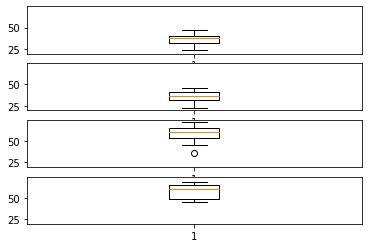

In [73]:
# Create a list of Drug Regimens of interest
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create a list that stores the max size of tumor for each drug regimen
ax = (ax_cap, ax_ram, ax_inf, ax_cet)

fig, ax = plt.subplots(4, sharey=True)

# Loop through the different drug regimens
for index, drug in enumerate(drugs):
    
    # Get  all tumor volumes at max timepoint for current regimen
    final_volume = greatest_timepoint_by_ID.loc[greatest_timepoint_by_ID['Drug Regimen'] == drug, :]
    
    # Read quartiles
    quars = final_volume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    
    # Store outliers
    outliers = final_volume.loc[(final_volume['Tumor Volume (mm3)'] > (quars[.75] + 1.5 * (quars[.75] - quars[.25]))) | 
                                (final_volume['Tumor Volume (mm3)'] < (quars[.25] - 1.5 * (quars[.75] - quars[.25]))), :]
    #print(f'Outliers are greater than {(quars[.75] + 1.5 * (quars[.75] - quars[.25]))} and less that {(quars[.25] - 1.5 * (quars[.75] - quars[.25]))}')
    #print(final_volume)
    #print(outliers)
    ax[index].boxplot(final_volume['Tumor Volume (mm3)'])
    ax[index].set

plt.show()